In [1]:
# Outlook on the Close trend
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
dataframe = pd.read_csv('tsla.csv', usecols=['Date','Close'], index_col=False)
#dataframe = dataframe.iloc[::-1]
#print(dataframe)
plt.plot(pd.to_datetime(dataframe['Date']), dataframe['Close'],label='Real_data')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
dataframe = pd.read_csv('tsla.csv', usecols=['Close'], index_col=False)
#print(dataframe.head())
#print(dataframe)
#dataframe = dataframe.iloc[::-1]

dataframe = dataframe.reset_index(drop=True)
# dataframe = dataframe[dataframe.columns[::-1]]
dataframe 

,Close
0,240.009995
1,223.410004
2,223.429993
3,219.039993
4,215.649994
5,211.000000
6,207.850006
7,209.970001
8,200.309998
9,206.179993


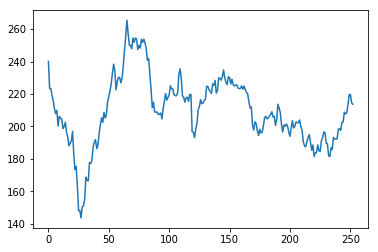

In [3]:
plt.plot(dataframe.index, dataframe['Close'])
plt.show()

In [4]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation
from keras.layers import LSTM
from keras.optimizers import Adam,RMSprop
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

C:\Users\liu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [6]:
# Conversuin of our data to floats as it is more suitable for this neural networks
# print(dataframe)
dataset = dataframe.values
print(dataset)
dataset = dataset.astype('float32')

[[240.00999451]
 [223.41000366]
 [223.42999268]
 [219.03999329]
 [215.6499939 ]
 [211.        ]
 [207.8500061 ]
 [209.97000122]
 [200.30999756]
 [206.17999268]
 [204.99000549]
 [204.72000122]
 [198.69999695]
 [199.97000122]
 [202.55000305]
 [196.38000488]
 [193.55999756]
 [188.07000732]
 [189.69999695]
 [191.19999695]
 [196.94000244]
 [182.77999878]
 [173.47999573]
 [175.33000183]
 [162.6000061 ]
 [147.99000549]
 [148.25      ]
 [143.66999817]
 [150.47000122]
 [151.03999329]
 [155.16999817]
 [168.67999268]
 [166.77000427]
 [166.58000183]
 [177.74000549]
 [177.21000671]
 [179.        ]
 [187.42999268]
 [190.33999634]
 [191.92999268]
 [186.3500061 ]
 [188.33999634]
 [195.74000549]
 [201.03999329]
 [205.28999329]
 [202.6000061 ]
 [208.72000122]
 [205.17999268]
 [207.5       ]
 [215.1499939 ]
 [218.33999634]
 [221.92999268]
 [226.38000488]
 [232.74000549]
 [238.32000732]
 [234.24000549]
 [222.58000183]
 [227.75      ]
 [230.25999451]
 [230.13000488]
 [226.88999939]
 [229.77000427]
 [237.58

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
print(len(dataset))
train_size = int(len(dataset)-63)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# print(train)

253
190 63


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(testY)
# print(trainX)

[0.5321561  0.4708829  0.43482542 0.47047222 0.46349084 0.4750718
 0.46464074 0.43400407 0.4130596  0.4552772  0.49190962 0.4552772
 0.4634086  0.4853387  0.481889   0.48106778 0.4956057  0.46242297
 0.44402456 0.3870225  0.36427104 0.35934293 0.3851334  0.40689945
 0.42110884 0.38102663 0.34234095 0.36870635 0.31030798 0.32936347
 0.3306775  0.3695277  0.33963037 0.3355236  0.39014375 0.4063244
 0.43515396 0.4308008  0.37700212 0.3756057  0.3138399  0.31047225
 0.35425055 0.3464477  0.40640652 0.3993429  0.3984394  0.4004928
 0.44747424 0.45190966 0.44279265 0.48312116 0.4850924  0.53486645
 0.5259137  0.53207386 0.5722381  0.62308    0.624805   0.5832443 ]


In [11]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D, Conv2D, MaxPooling2D,MaxPooling1D
cnn = Sequential()
cnn.add(Conv1D(4, kernel_size=2, strides=1,padding='same',
                 activation='relu',
                 input_shape=(2,1)))
cnn.add(MaxPooling1D(pool_size=2))
  
cnn.add(Flatten())
cnn.add(Dense(30))

cnn.add(Dense(1))
cnn.summary()
cnn.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto') 
checkpointer = ModelCheckpoint(filepath="best_weights_cnn.hdf5", verbose=0, save_best_only=True) # save best model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 4)              12        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 4)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [13]:
print(trainX.shape)
x_train2 = trainX.reshape((187,2,1))
print(x_train2.shape)
print(trainY.shape)
print(testX.shape)
x_test2 = testX.reshape((60,2,1))

# cnn.fit(x_train2, trainY, epochs=100, batch_size=1, verbose=2)

(187, 1, 2)
(187, 2, 1)
(187,)
(60, 1, 2)


In [14]:
cnn.fit(x_train2,trainY, batch_size=1,verbose=2,epochs=100)

Epoch 1/100
 - 3s - loss: 0.0806
Epoch 2/100
 - 1s - loss: 0.0141
Epoch 3/100
 - 1s - loss: 0.0077
Epoch 4/100
 - 1s - loss: 0.0041
Epoch 5/100
 - 1s - loss: 0.0028
Epoch 6/100
 - 1s - loss: 0.0025
Epoch 7/100
 - 1s - loss: 0.0023
Epoch 8/100
 - 1s - loss: 0.0022
Epoch 9/100
 - 1s - loss: 0.0022
Epoch 10/100
 - 1s - loss: 0.0024
Epoch 11/100
 - 1s - loss: 0.0023
Epoch 12/100
 - 1s - loss: 0.0024
Epoch 13/100
 - 1s - loss: 0.0023
Epoch 14/100
 - 1s - loss: 0.0026
Epoch 15/100
 - 1s - loss: 0.0026
Epoch 16/100
 - 1s - loss: 0.0023
Epoch 17/100
 - 1s - loss: 0.0023
Epoch 18/100
 - 1s - loss: 0.0024
Epoch 19/100
 - 1s - loss: 0.0025
Epoch 20/100
 - 1s - loss: 0.0023
Epoch 21/100
 - 1s - loss: 0.0021
Epoch 22/100
 - 1s - loss: 0.0023
Epoch 23/100
 - 1s - loss: 0.0024
Epoch 24/100
 - 1s - loss: 0.0023
Epoch 25/100
 - 1s - loss: 0.0022
Epoch 26/100
 - 1s - loss: 0.0025
Epoch 27/100
 - 1s - loss: 0.0023
Epoch 28/100
 - 1s - loss: 0.0023
Epoch 29/100
 - 1s - loss: 0.0022
Epoch 30/100
 - 1s - lo

In [15]:
trainPredict = cnn.predict(x_train2)
testPredict = cnn.predict(x_test2)
# invert predictions
# print(trainPredict)
trainPredict = scaler.inverse_transform(trainPredict)
print(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error



[[225.98499]
 [225.90205]
 [221.56493]
 [218.1885 ]
 [213.5734 ]
 [210.43248]
 [212.50752]
 [202.97668]
 [208.71642]
 [207.57703]
 [207.30289]
 [201.35355]
 [202.57104]
 [205.12791]
 [199.04799]
 [196.2237 ]
 [190.78223]
 [192.35867]
 [193.85074]
 [199.53107]
 [185.57668]
 [176.3008 ]
 [178.07108]
 [165.76254]
 [156.16893]
 [151.93123]
 [151.93123]
 [154.07098]
 [154.62038]
 [158.60109]
 [171.62274]
 [169.7818 ]
 [169.59866]
 [180.40944]
 [179.95483]
 [181.72005]
 [190.05983]
 [192.98701]
 [194.57591]
 [189.0728 ]
 [191.00438]
 [198.32779]
 [203.60988]
 [207.84161]
 [205.21022]
 [211.24007]
 [207.78043]
 [210.05067]
 [217.62311]
 [220.82213]
 [224.38872]
 [228.80748]
 [235.1186 ]
 [240.6709 ]
 [236.67444]
 [225.12927]
 [230.16504]
 [232.67686]
 [232.56395]
 [229.36208]
 [232.18744]
 [239.93129]
 [249.26674]
 [257.703  ]
 [267.58597]
 [259.52625]
 [252.43105]
 [252.23874]
 [250.16304]
 [256.77942]
 [254.183  ]
 [256.78467]
 [256.17865]
 [249.74292]
 [252.27145]
 [250.62772]
 [256.01172]

In [16]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Train Score: 5.83 RMSE
Test Score: 4.61 RMSE


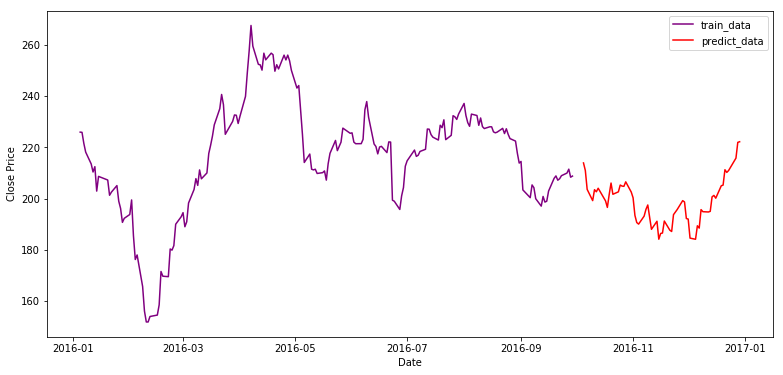

In [17]:
# shift train predictions for plotting
dataframe1 = pd.read_csv('tsla.csv', usecols=['Date'], index_col=False)

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(13, 6)
fig.savefig('test2png.png',dpi=100)

# plt.plot(scaler.inverse_transform(dataset))
plt.plot(pd.to_datetime(dataframe1['Date']),trainPredictPlot, color='purple',label='train_data')
plt.plot(pd.to_datetime(dataframe1['Date']),testPredictPlot, color='red',label='predict_data')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [18]:
import csv
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.dates as md
import mpl_finance as mpf
import matplotlib.pyplot as plt
import os
from datetime import datetime
Data_Predict=[]

Data_Predict = numpy.empty_like(dataset)
Data_Predict[:, :] = numpy.nan
Data_Predict[look_back:len(trainPredict)+look_back, :] = trainPredict
Data_Predict[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# Data_Predict[0:1, :] = dataframe[0:1, :]
# print(Data_Predict)
Close_Predict=[]
Data_Prepare=Data_Predict.tolist()
for sublist in Data_Prepare:
    for item in sublist:
        Close_Predict.append(item)
# print(Data_Predict1)
print(len(Close_Predict))
filename = 'tsla.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    Date, Open, High, Low, Close = [], [], [], [], []
    print(reader)
    for row in reader:      
        current_date = datetime.strptime(row[0], '%Y-%m-%d')
        Date.append(current_date)
        
        Close1 = float(row[4])
        Close.append(Close1)
#         print(Open)
#         High1 = float(row[1])
        High.append(140)
        
#         Low1 = float(row[2])
#         print(type(Low1))
        Low.append(140)

#         Close1 = float(row[4])
#         Close.append(Close_Predict)
#         print(Date)
# print(Low)
datas = []
for i in range(len(Date)):
    datas.append([md.date2num(Date[i]), float(Close[i]), float(High[i]), \
                 float(Low[i]), float(Close_Predict[i])])        

253


([<matplotlib.lines.Line2D at 0x1b32d858630>,
  <matplotlib.patches.Rectangle at 0x1b342c085c0>])

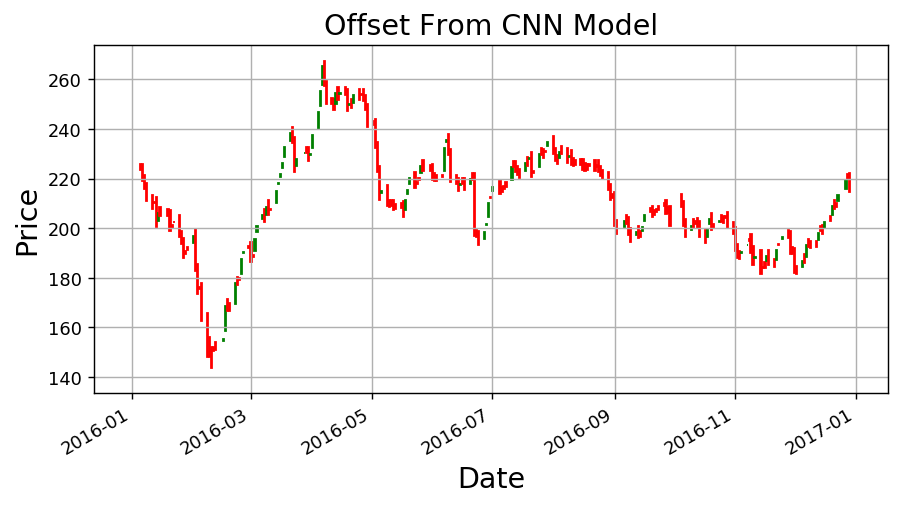

In [19]:
fig = plt.figure(2, dpi =128, figsize =(8,4))
fig.set_size_inches(8, 4)
ax2 = plt.subplot(111)
ax2.set_title('Offset From CNN Model', fontsize =16)
ax2.set_xlabel('Date', fontsize =16)
ax2.set_ylabel('Price', fontsize =16)
ax2.grid(True)                            #显示网格
ax2.xaxis_date()                         #显示为日期
fig.autofmt_xdate()
mpf.candlestick_ohlc(ax2, datas, width =0.6, colorup ='r', colordown ='g')

[nan, nan, 2.55499267578125, 6.862060546875, 5.9149322509765625, 7.188507080078125, 5.723388671875, 0.4624786376953125, 12.197525024414062, -3.20330810546875, 3.726409912109375, 2.857025146484375, 8.602890014648438, 1.383544921875, 0.0210418701171875, 8.747909545898438, 5.4879913330078125, 8.1536865234375, 1.0822296142578125, 1.1586761474609375, -3.089263916015625, 16.751068115234375, 12.0966796875, 0.970794677734375, 15.4710693359375, 17.772537231445312, 7.9189300537109375, 8.26123046875, 1.4612274169921875, 3.0309906005859375, -0.54962158203125, -10.078903198242188, 4.8527374267578125, 3.2017974853515625, -8.141342163085938, 3.199432373046875, 0.954833984375, -5.7099456787109375, -0.2801666259765625, 1.0570220947265625, 8.225906372070312, 0.7328033447265625, -4.735626220703125, -2.7122039794921875, -1.68011474609375, 5.241607666015625, -3.5097808837890625, 6.0600738525390625, 0.280426025390625, -5.0993194580078125, -0.716888427734375, -1.1078643798828125, -1.9912872314453125, -3.9325

C:\Users\liu\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


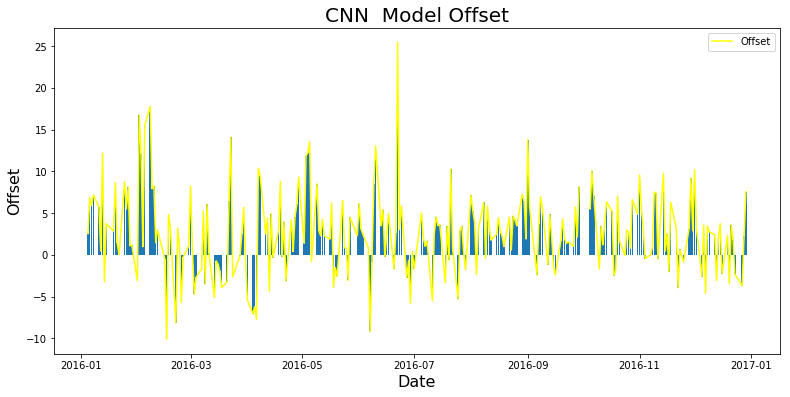

In [20]:
Data_Analysis = []
fig=plt.figure()
for i in range(len(Close)):
    Data_Analysis.append(float(Close_Predict[i])-float(Close[i]))
print(Data_Analysis)

rects=plt.bar(Date, Data_Analysis,label='offset')
plt.plot(Date, Data_Analysis, color='yellow')
# plt.hist(Date, Data_Analysis, normed=1, facecolor='blue', alpha=0.5)  
# for rect in rects:
#     height = rect.get_height()
#     plt.text(rect.get_x() + rect.get_width() / 2, height, str(Data_Analysis), ha='center', va='bottom')
# for xx, yy in zip(len(Data_Analysis),Data_Analysis):
#     plt.text(xx, yy+0.1, yy, ha='center')
# plt.plot(pd.to_datetime(dataframe1['Date']), scaler.inverse_transform(dataset),label='Real_data')
fig.set_size_inches(13, 6)
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Date', fontsize =16)
ax.set_ylabel('Offset', fontsize =16)
ax.set_title("CNN  Model Offset",fontsize=20)
plt.legend(['Offset'],loc='upper right')
plt.show()

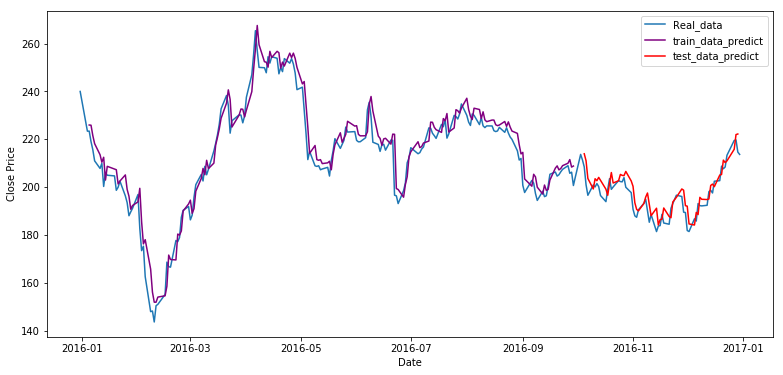

In [21]:
dataframe1 = pd.read_csv('tsla.csv', usecols=['Date'], index_col=False)
#dataframe1 = dataframe1.iloc[::-1]#去掉最后一列

dataframe1 = dataframe1.reset_index(drop=True)
# dataframe = dataframe[dataframe.columns[::-1]]
dataframe1 
plt.plot(pd.to_datetime(dataframe1['Date']), scaler.inverse_transform(dataset),label='Real_data')
plt.plot(pd.to_datetime(dataframe1['Date']),trainPredictPlot, color='purple',label='train_data_predict')
plt.plot(pd.to_datetime(dataframe1['Date']),testPredictPlot, color='red',label='test_data_predict')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(13, 6)

plt.show()

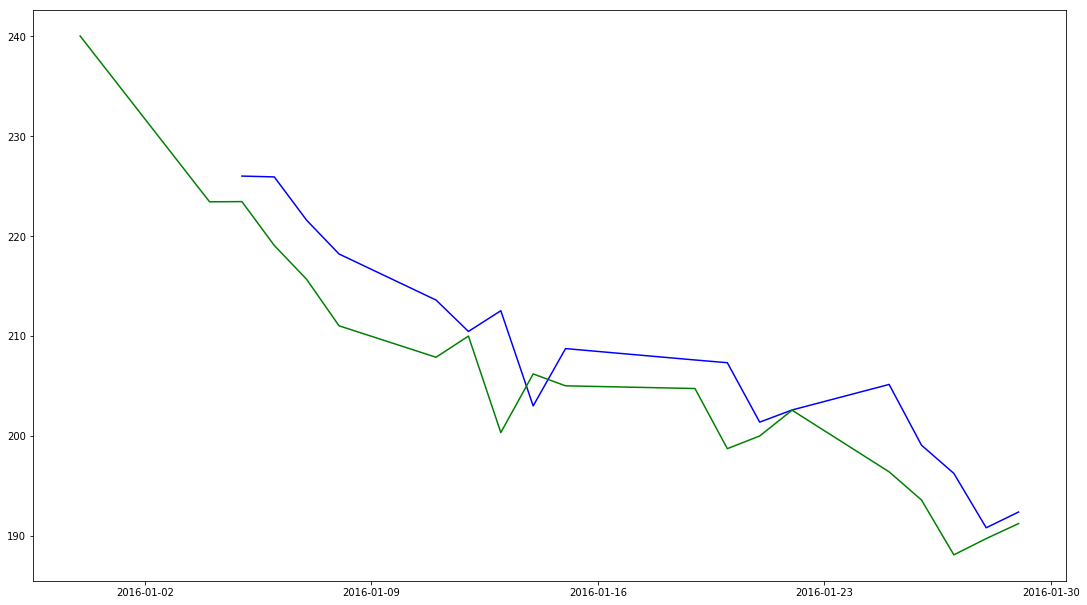

In [22]:
df_o = pd.DataFrame(scaler.inverse_transform(dataset), columns=["Close"])
result_o = pd.concat([dataframe1, df_o], axis=1, join_axes=[dataframe1.index])

df_train = pd.DataFrame(trainPredictPlot, columns=["Close"])
result_train = pd.concat([dataframe1, df_train], axis=1, join_axes=[dataframe1.index])

df_test = pd.DataFrame(testPredictPlot, columns=["Close"])
result_test = pd.concat([dataframe1, df_test], axis=1, join_axes=[dataframe1.index])


plt.plot(pd.to_datetime(result_train['Date'].head(20)), result_train['Close'].head(20), color='blue')
plt.plot(pd.to_datetime(result_o.head(20)['Date']), result_o.head(20)['Close'], color='green')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [23]:
result_train

,Date,Close
0,2015-12-31,NaN
1,2016-01-04,NaN
2,2016-01-05,225.984985
3,2016-01-06,225.902054
4,2016-01-07,221.564926
5,2016-01-08,218.188507
6,2016-01-11,213.573395
7,2016-01-12,210.432480
8,2016-01-13,212.507523
9,2016-01-14,202.976685


In [24]:
result_test.tail(24)

,Date,Close
229,2016-11-28,199.256531
230,2016-11-29,198.754623
231,2016-11-30,192.280045
232,2016-12-01,192.071548
233,2016-12-02,184.640854
234,2016-12-05,184.189240
235,2016-12-06,189.452698
236,2016-12-07,188.547089
237,2016-12-08,195.753494
238,2016-12-09,194.948990
